In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io

In [2]:
mat = scipy.io.loadmat("EEG-data/Subject1_1D.mat")
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat Jan 27 10:48:51 2007',
 '__version__': '1.0',
 '__globals__': [],
 'readme': array(['This subject is a 21 year old, right handed male with no known medical conditions. The EEG consists of actual random movements of left and right hand recorded with eyes closed. Each row represents one electrode. The order of the electrodes is FP1 FP2 F3 F4 C3 C4 P3 P4 O1 O2 F7 F8 T3 T4 T5 T6 FZ CZ PZ. The recording was done at 500Hz using Neurofax EEG System which uses a daisy chain montage. The data was exported with a common reference using Eemagine EEG. AC Lines in this country work at 50 Hz. For further information, please contact midhatali@gmail.com'],
       dtype='<U560'),
 'left': array([[  -5.078,  -17.48 ,    2.051, ...,  -59.277,  -59.668,  -60.254],
        [  -5.078,  -18.359,  -11.426, ..., -291.016, -291.504, -270.703],
        [   7.91 ,   -8.203,   32.129, ...,  -25.391,  -20.117,  -26.172],
        ...,
        [  

In [3]:
numpy_left = mat['left']
numpy_right = mat['right']

numpy_left = numpy_left.reshape(-1,19)
numpy_right = numpy_right.reshape(-1,19)

left = pd.DataFrame(numpy_left, columns=['FP1', 'FP2', 'F3', 'F4', 
                                          'C3', 'C4', 'P3', 'P4', 
                                          'O1', 'O2', 'F7', 'F8', 
                                          'T3', 'T4', 'T5', 'T6', 
                                          'FZ', 'CZ', 'PZ'])

right = pd.DataFrame(numpy_right, columns=['FP1', 'FP2', 'F3', 'F4', 
                                          'C3', 'C4', 'P3', 'P4', 
                                          'O1', 'O2', 'F7', 'F8', 
                                          'T3', 'T4', 'T5', 'T6', 
                                          'FZ', 'CZ', 'PZ'])

In [4]:
left

,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,FZ,CZ,PZ
0,-5.078,-17.480,2.051,31.152,37.500,28.320,15.137,5.566,0.977,10.254,3.516,-13.867,7.520,26.953,27.734,32.227,24.512,10.254,-3.809
1,-6.445,-4.785,-3.906,7.324,17.676,22.363,16.602,6.445,1.758,-5.859,-11.523,-14.551,-19.434,2.734,17.578,20.020,25.195,30.469,8.594
2,-12.988,-14.355,-12.598,-7.910,16.895,18.555,29.199,37.988,26.563,3.711,12.207,0.977,2.832,-1.562,-0.391,14.453,29.004,24.121,32.422
3,23.340,11.035,5.664,5.566,-3.418,-2.539,16.602,31.543,17.090,12.012,9.961,2.637,-10.059,-20.605,-34.082,4.492,26.563,32.227,29.492
4,20.020,1.465,-13.281,-10.352,3.027,2.930,6.934,13.086,27.734,30.664,20.313,2.441,-6.250,-17.187,-12.500,-11.523,-2.246,15.723,17.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64295,80.957,79.102,79.980,81.348,81.445,85.449,87.793,91.113,84.082,77.734,65.820,56.934,60.059,73.340,72.656,70.898,86.426,92.969,87.109
64296,86.133,83.789,77.148,81.543,86.719,87.598,87.012,95.215,103.711,100.293,92.578,79.883,77.246,75.195,75.781,83.008,86.523,93.750,98.828
64297,97.461,93.555,83.398,74.316,72.266,80.078,77.246,83.887,94.727,102.539,96.777,90.137,83.984,76.270,76.953,79.004,78.809,83.301,90.234
64298,94.824,96.875,90.625,79.004,69.922,70.312,75.293,77.441,76.855,95.020,98.633,91.406,86.426,84.277,77.832,74.902,78.613,81.641,82.422


In [5]:
right

,FP1,FP2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T3,T4,T5,T6,FZ,CZ,PZ
0,-5.762,-10.254,-16.309,-34.082,-35.156,-38.477,-29.883,-34.375,-30.957,-20.313,-20.508,-18.262,-11.621,-27.539,-42.969,-30.859,-20.215,-19.727,-8.008
1,-0.391,2.246,-5.762,-6.641,-26.855,-39.160,-25.000,-25.195,-29.492,-19.824,-12.207,-8.008,-5.273,-10.449,-27.930,-35.840,-32.129,-33.887,-25.781
2,-11.621,-4.980,-18.945,-13.379,3.320,-15.820,-25.586,-29.883,-12.988,0.195,-1.172,4.395,10.449,7.617,-1.367,-18.066,-17.969,-22.559,-18.652
3,-16.699,-9.473,-1.074,2.734,2.246,-10.937,-29.004,-31.348,-31.738,-34.473,-27.051,-17.187,-5.469,-3.809,-10.742,-2.246,-28.320,-25.391,-33.008
4,-37.500,-36.914,-27.930,-16.992,-9.082,-11.328,-13.867,-30.566,-34.082,-44.336,-32.031,-16.211,-7.031,-7.031,1.465,-7.715,-3.027,1.465,-5.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64295,124.316,122.070,109.668,97.949,98.438,107.520,109.961,116.309,125.195,129.297,122.852,124.219,124.805,117.383,112.500,112.012,114.258,124.121,128.027
64296,129.395,129.785,128.711,116.797,102.246,98.730,105.078,100.293,112.500,116.602,126.074,122.266,121.289,106.250,98.828,96.875,106.934,110.449,115.039
64297,118.262,123.340,130.566,130.859,113.867,105.469,104.492,109.766,108.105,115.234,125.293,131.738,131.641,126.855,112.109,107.227,106.250,109.668,114.453
64298,120.215,128.516,132.129,137.988,135.352,122.266,112.109,112.793,114.355,115.625,115.918,122.461,129.980,126.660,124.609,114.160,104.102,96.094,99.121


"The order of the electrodes is FP1 FP2 F3 F4 C3 C4 P3 P4 O1 O2 F7 F8 T3 T4 T5 T6 FZ CZ PZ."

Channels C3, C4, and CZ are usually associated with voluntary movements.

In [6]:
left_channels = left[["C3", "C4", "CZ", "PZ"]]
right_channels = right[["C3", "C4", "CZ", "PZ"]]

In [7]:
left_channels

,C3,C4,CZ,PZ
0,37.500,28.320,10.254,-3.809
1,17.676,22.363,30.469,8.594
2,16.895,18.555,24.121,32.422
3,-3.418,-2.539,32.227,29.492
4,3.027,2.930,15.723,17.480
...,...,...,...,...
64295,81.445,85.449,92.969,87.109
64296,86.719,87.598,93.750,98.828
64297,72.266,80.078,83.301,90.234
64298,69.922,70.312,81.641,82.422


In [8]:
right_channels

,C3,C4,CZ,PZ
0,-35.156,-38.477,-19.727,-8.008
1,-26.855,-39.160,-33.887,-25.781
2,3.320,-15.820,-22.559,-18.652
3,2.246,-10.937,-25.391,-33.008
4,-9.082,-11.328,1.465,-5.273
...,...,...,...,...
64295,98.438,107.520,124.121,128.027
64296,102.246,98.730,110.449,115.039
64297,113.867,105.469,109.668,114.453
64298,135.352,122.266,96.094,99.121


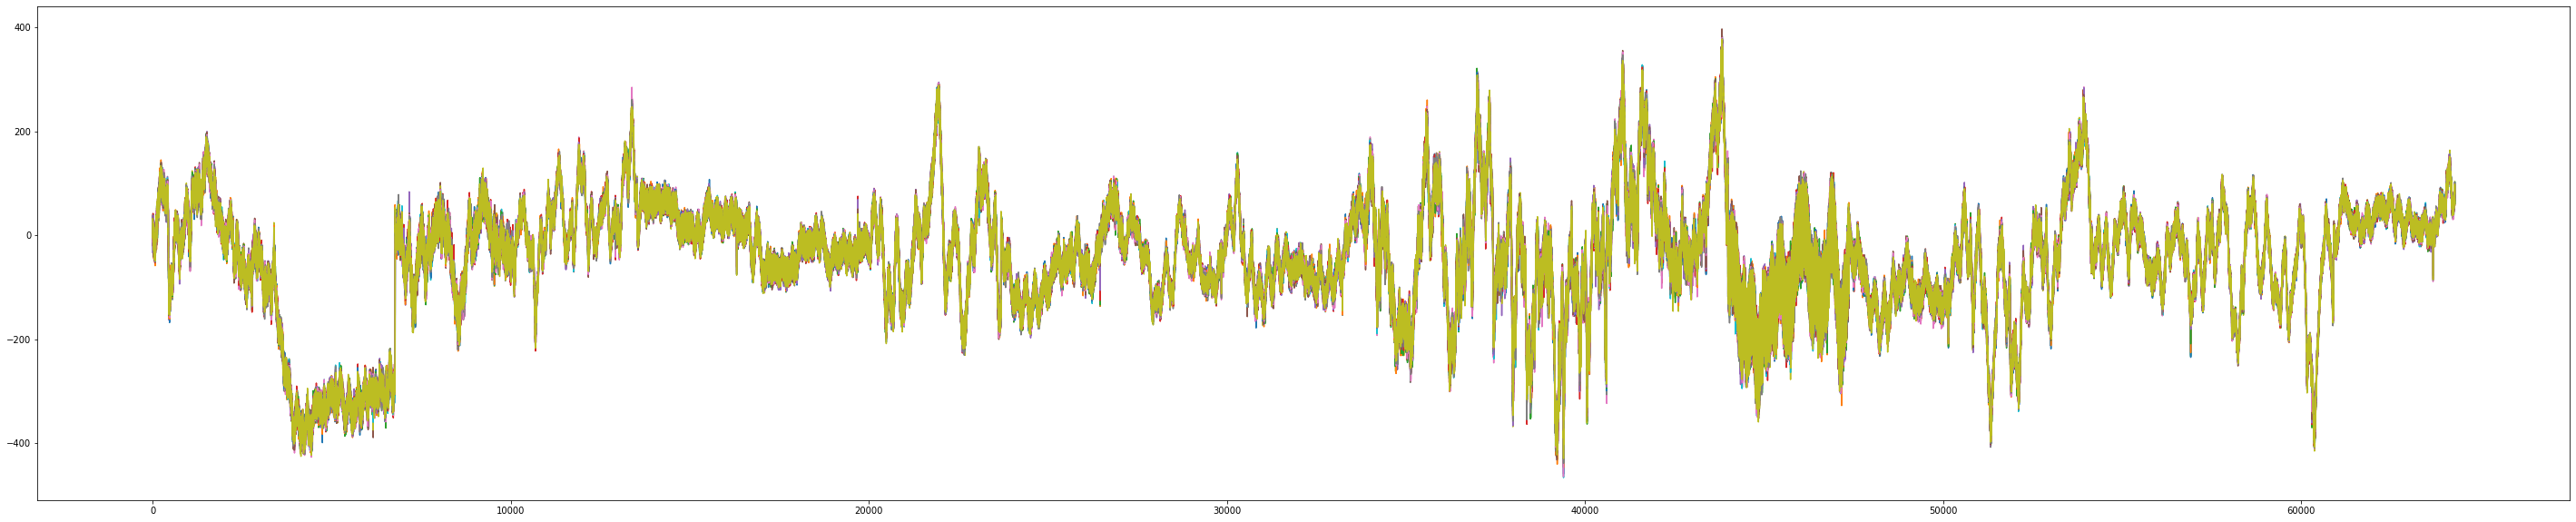

In [9]:
plt.figure(figsize=(50,10))
plt.plot(left)

In [10]:
import mne
from mne import create_info
from mne.io import RawArray

In [11]:
names = ['FP1', 'FP2', 'F3', 'F4', 
            'C3', 'C4', 'P3', 'P4', 
            'O1', 'O2', 'F7', 'F8', 
            'T3', 'T4', 'T5', 'T6', 
            'FZ', 'CZ', 'PZ']

In [12]:
def df_to_raw(df):
    sfreq = 475
    ch_names = list(df.columns)
    ch_types = ['eeg']*(len(ch_names)-1) + ['stim']
    ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')

    df = df.T  #mne looks at the tranpose() format
    df[:-1] *= 1e-6  #convert from uVolts to Volts (mne assumes Volts data)

    info = create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)

    raw = mne.io.RawArray(df, info)
    raw.set_montage(ten_twenty_montage, match_case=False)

    #try plotting the raw data of its power spectral density
    raw.plot_psd()

    return raw

Creating RawArray with float64 data, n_channels=19, n_times=64300
    Range : 0 ... 64299 =      0.000 ...   135.366 secs
Ready.
Effective window size : 4.312 (s)


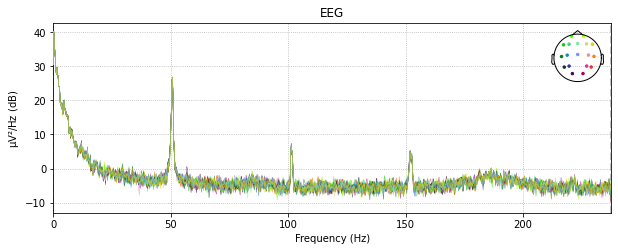

In [13]:
raw = df_to_raw(left)

In [14]:
raw.notch_filter(50.5, filter_length='auto', phase='zero', method='iir') 
# raw1.notch_filter([50,100,150], filter_length='auto', phase='zero') 
#250/2 based on Nyquist Theorem

Setting up band-stop filter from 50 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.87, 51.13 Hz: -6.02, -6.02 dB



TypeError: expected str, bytes or os.PathLike object, not NoneType

<RawArray | 19 x 64300 (135.4 s), ~9.4 MB, data loaded>

Effective window size : 4.312 (s)


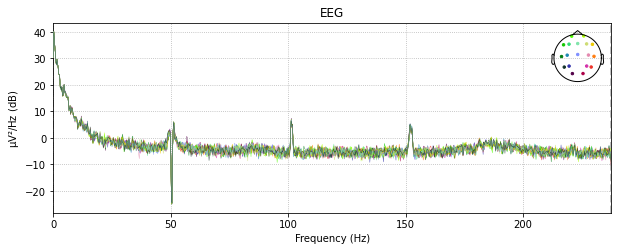

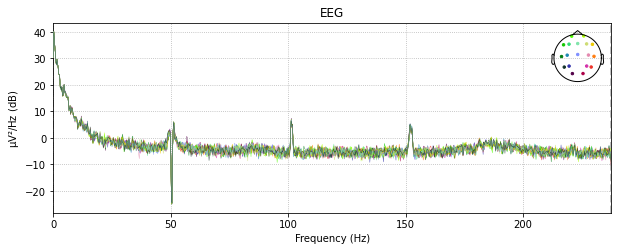

In [15]:
raw.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 8.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 4.312 (s)


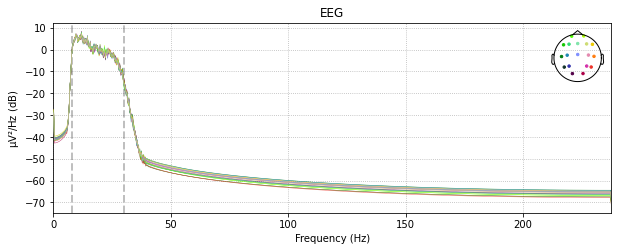

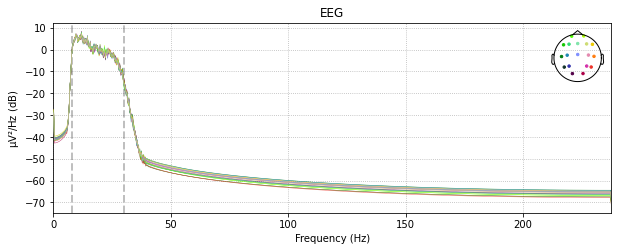

In [18]:
raw.filter(8, 30, method='iir')

raw.plot_psd()

Effective window size : 4.312 (s)


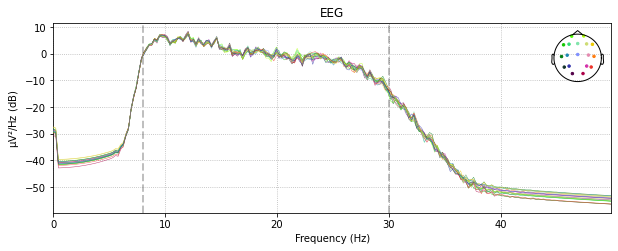

Figure(720x252)


In [19]:
print(raw.plot_psd(0,50))

Creating RawArray with float64 data, n_channels=4, n_times=64300
    Range : 0 ... 64299 =      0.000 ...   135.366 secs
Ready.
Effective window size : 4.312 (s)


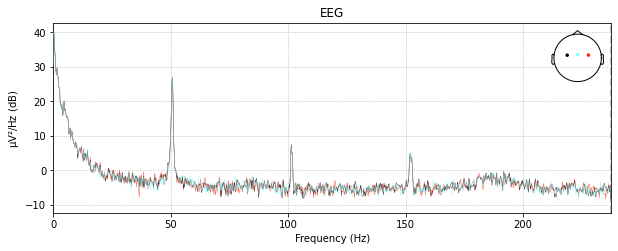

In [20]:
raw1 = df_to_raw(left_channels)

In [21]:
raw1.notch_filter(50.5, filter_length='auto', phase='zero', method='iir') 

Setting up band-stop filter from 50 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.87, 51.13 Hz: -6.02, -6.02 dB



TypeError: expected str, bytes or os.PathLike object, not NoneType

<RawArray | 4 x 64300 (135.4 s), ~2.0 MB, data loaded>

Effective window size : 4.312 (s)


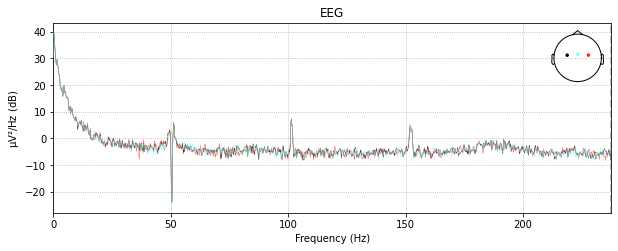

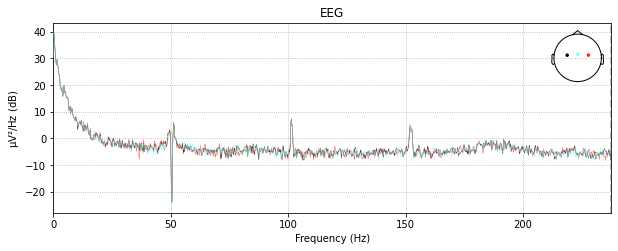

In [22]:
raw1.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

Effective window size : 4.312 (s)


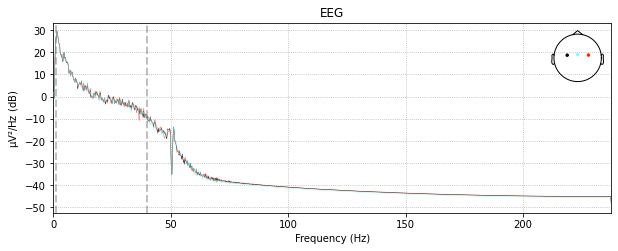

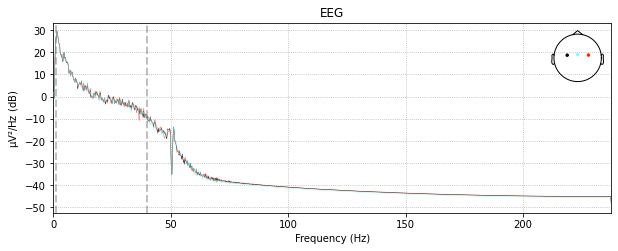

In [23]:
raw1.filter(1, 40, method='iir')

raw1.plot_psd()

Effective window size : 4.312 (s)


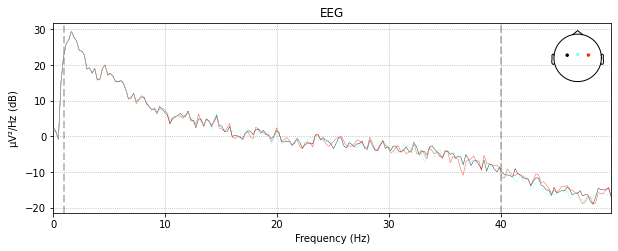

Figure(720x252)


In [24]:
print(raw1.plot_psd(0,50))
#LEFT SIDE c3,c4,cz

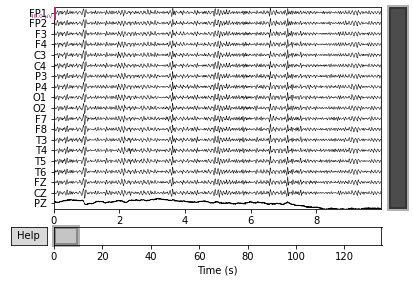

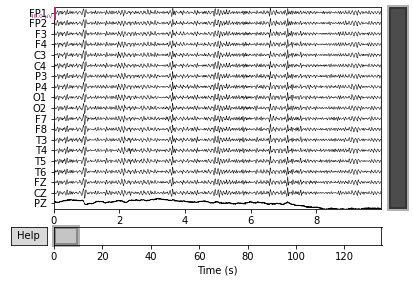

In [52]:
raw.plot(duration=10)

In [28]:
eeg_channels = mne.pick_types(raw.info, eeg=True)

In [29]:
#this one requires expertise to specify the right tmin, tmax
event_id = {'0': 1, '1' : 2, '2': 3, '3':4, '4':5, '5':6, '6':7, '7':8, '8':9, '9':10}
tmin = 0 #-0.1
tmax = 0.5 #0.5 seconds
picks= eeg_channels
epochs = getEpochs(raw, event_id, tmin, tmax, picks)
#print(epochs.get_data())

Trigger channel has a non-zero initial value of 3 (consider using initial_event=True to detect this event)
31279 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213

C:\Users\anujg\AppData\Local\Temp/ipykernel_14724/472719444.py:6: RuntimeWarning: Trigger channel contains negative values, using absolute value. If data were acquired on a Neuromag system with STI016 active, consider using uint_cast=True to work around an acquisition bug
  events = find_events(raw)


ValueError: You have 14632 events shorter than the shortest_event. These are very unusual and you may want to set min_duration to a larger value e.g. x / raw.info['sfreq']. Where x = 1 sample shorter than the shortest event length.

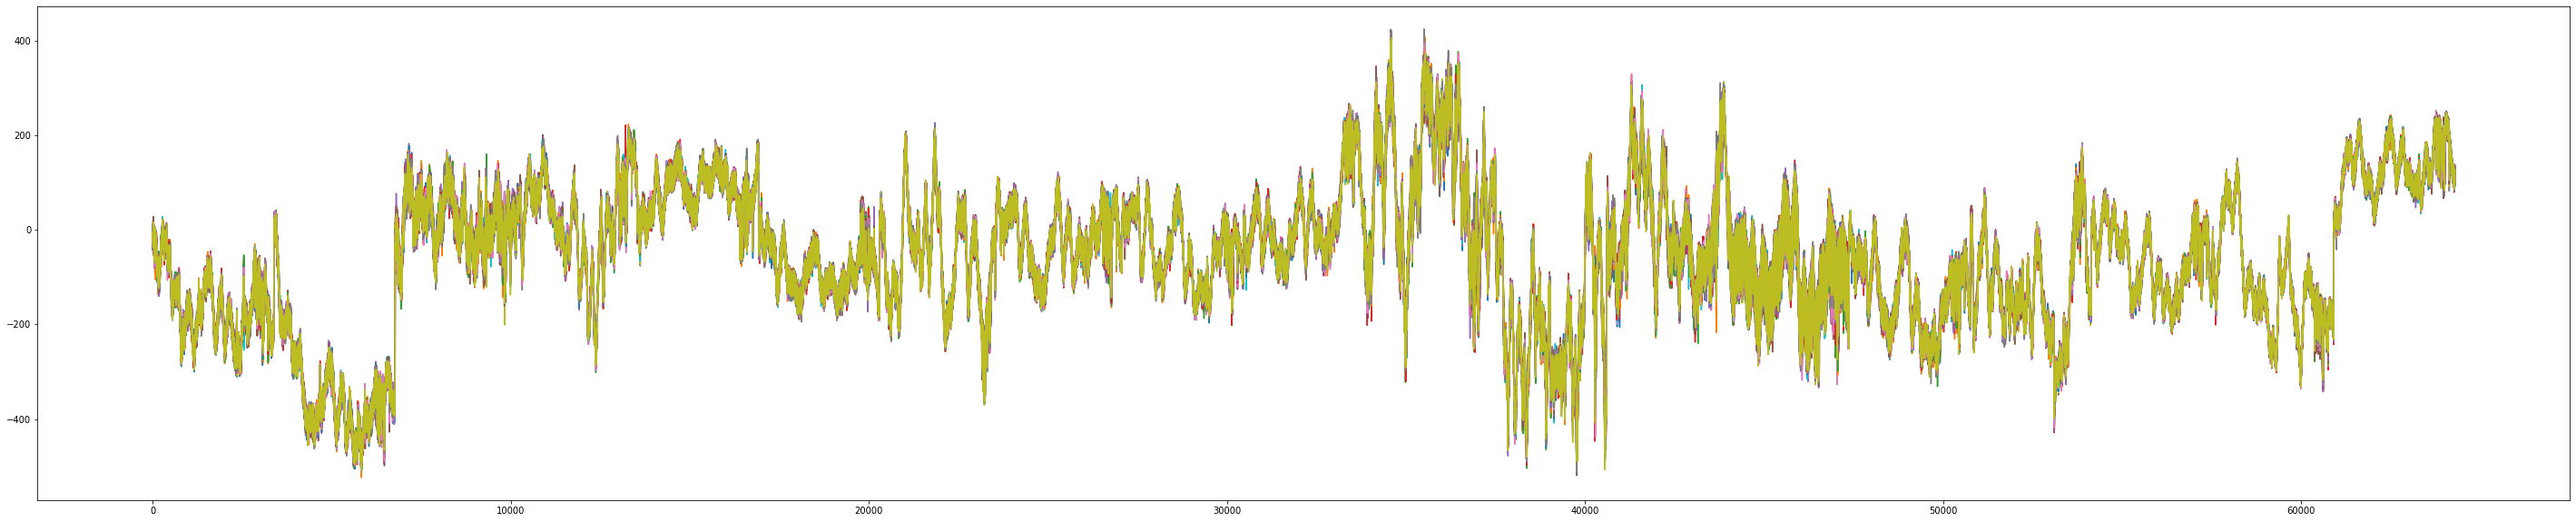

In [521]:
plt.figure(figsize=(50,10))
plt.plot(right)

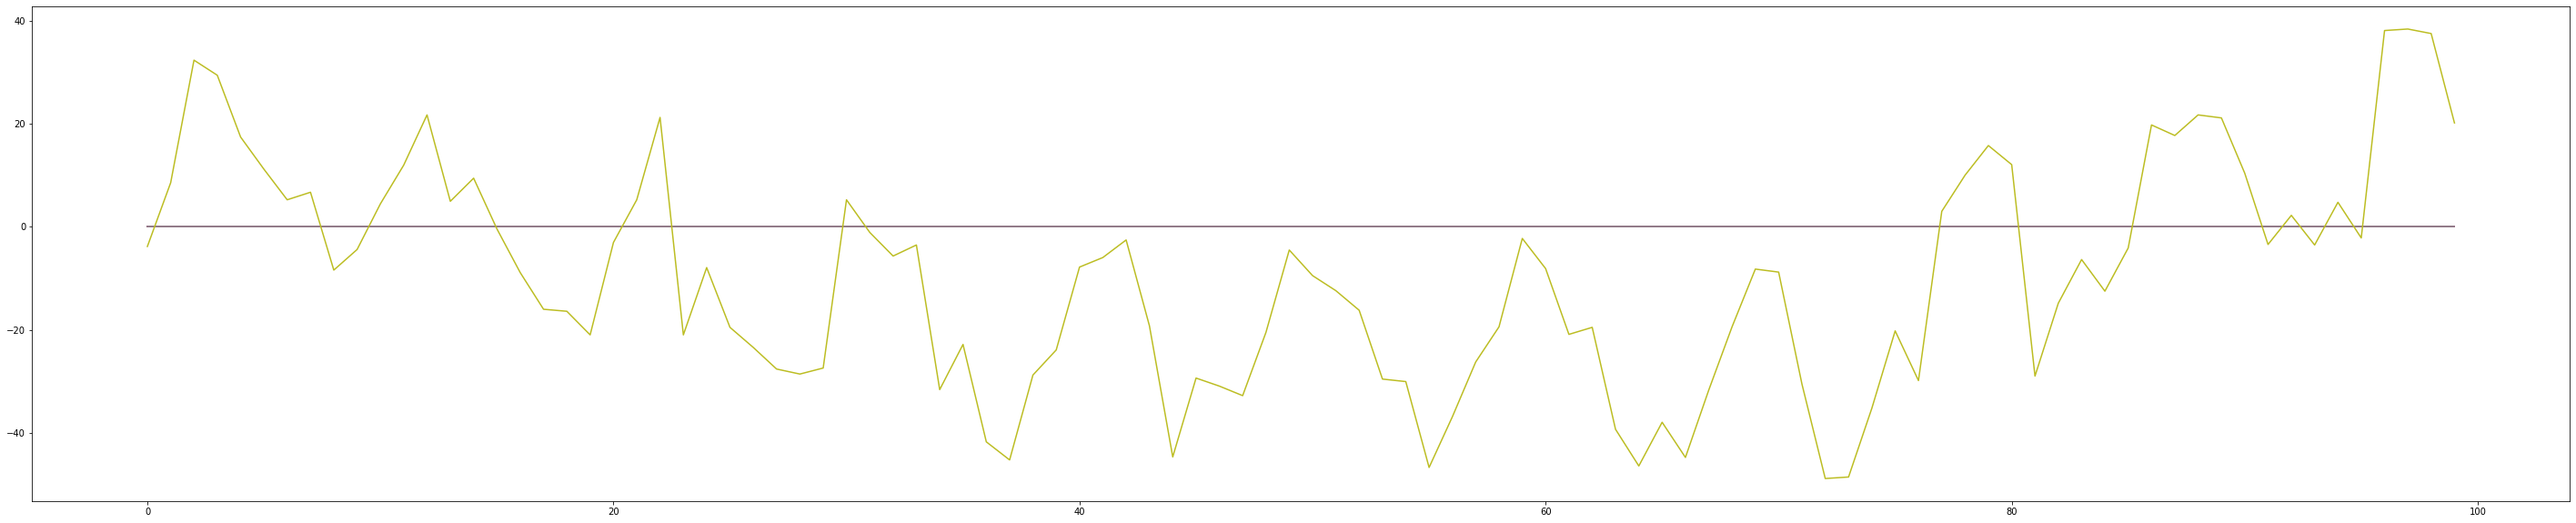

In [522]:
plt.figure(figsize=(50,10))
plt.plot(left[:100])

In [523]:
left0 = left.iloc[:,0]

<AxesSubplot:>

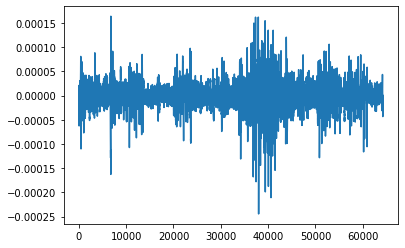

In [524]:
left0.plot()

In [639]:
def bandPassFilter(signal):
    fs = left['C4'].shape[0]
    lowcut = 0.01
    highcut = 64.0
    nyq = 0.5 * fs 
    low = lowcut / nyq
    high = highcut/ nyq
    
    order = 2
    b,a = scipy.signal.butter(order,[low,high],'bandpass',analog =False)
    y = scipy.signal.filtfilt(b,a,signal,axis = 0)
    return y

# def get_filter(data):
#     sensor_data = data
#     sensor_data = np.array(sensor_data)
#     time =  np.linspace(0,left['C4'].shape[0],left['C4'].shape[0])    

In [640]:
filtered_leftc4 = bandPassFilter(left)

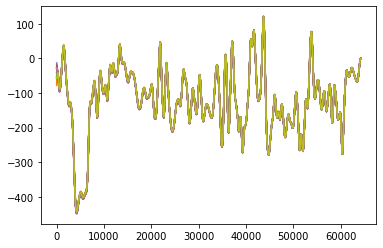

In [642]:
plt.plot(filtered_leftc4)